In [7]:
import SimpleITK as sitk

# Load the .mhd file
image = sitk.ReadImage(r"c:\Users\20202047\OneDrive - TU Eindhoven\Master\Year 1\Q3\Capita selecta\Group project\DevelopmentData\DevelopmentData\p102\prostaat.mhd")

# Get the spacing (voxel size in mm)
spacing = image.GetSpacing()  # Returns (x-spacing, y-spacing, z-spacing)

print(f"Voxel Spacing (mm per pixel): {spacing}")
print(f"X-axis spacing: {spacing[0]} mm")
print(f"Y-axis spacing: {spacing[1]} mm")
print(f"Z-axis spacing: {spacing[2]} mm")

Voxel Spacing (mm per pixel): (0.488281, 0.488281, 1.0)
X-axis spacing: 0.488281 mm
Y-axis spacing: 0.488281 mm
Z-axis spacing: 1.0 mm


In [14]:
from __future__ import print_function, absolute_import

import ipywidgets as widgets
from IPython.display import display
import elastix
import matplotlib.pyplot as plt
import os
import SimpleITK as sitk
import warnings
import numpy as np

warnings.filterwarnings("ignore", category=DeprecationWarning)

# Paths, Make sure the elastix folder etc. is included in your current working directory
paths = open(os.getcwd() + r"\\paths.txt").read().splitlines()
ELASTIX_PATH, TRANSFORMIX_PATH, DATA_PATH ,OUTPUT_DIR = paths

if not os.path.exists(ELASTIX_PATH):
    raise IOError('Elastix cannot be found, please set the correct ELASTIX_PATH.')
if not os.path.exists(TRANSFORMIX_PATH):
    raise IOError('Transformix cannot be found, please set the correct TRANSFORMIX_PATH.')

# Get patient names and select atlas patients
patient_list = [patient for patient in os.listdir(DATA_PATH) if os.path.isdir(os.path.join(DATA_PATH, patient))]
atlas_patients = patient_list[:15]

# Initialize a list to store the volumes for each patient
patient_volumes = {}

# Loop over each patient
for patient in atlas_patients:
    # Define the path to the segmentation .mhd file for the current patient
    delineation_image_path = os.path.join(DATA_PATH, patient, 'prostaat.mhd')
    
    # Load the segmentation image (delineation of prostate)
    image = sitk.ReadImage(delineation_image_path)
    
    # Convert the image to a NumPy array
    image_array = sitk.GetArrayFromImage(image)

    # Get voxel size from the image (voxel dimensions in mm)
    voxel_size = image.GetSpacing()  # (x-spacing, y-spacing, z-spacing) -> Width, Height, Depth

    # Correcting the voxel volume calculation
    voxel_volume_mm3 = voxel_size[0] * voxel_size[1] * voxel_size[2]  # Width * Height * Depth (mm³)

    # Calculate the number of white pixels (value 1) in the segmentation
    white_pixels = np.sum(image_array == 1)  # Count of white pixels in this patient’s segmentation
    
    # Calculate the total volume in cubic millimeters (mm³)
    total_volume_mm3 = white_pixels * voxel_volume_mm3

    # Convert the volume to cubic centimeters (cm³)
    total_volume_cm3 = total_volume_mm3 / 1000  # 1 cm³ = 1000 mm³

    # Store the calculated volume for this patient
    patient_volumes[patient] = total_volume_cm3

# Print the final dictionary of patient volumes
print("\nAll Patient Volumes (cm³):")
for patient, volume in patient_volumes.items():
    print(f"{patient}: {volume:.3f} cm³")



All Patient Volumes (cm³):
p102: 51.602 cm³
p107: 46.884 cm³
p108: 135.524 cm³
p109: 77.804 cm³
p115: 40.254 cm³
p116: 125.818 cm³
p117: 46.301 cm³
p119: 79.606 cm³
p120: 79.759 cm³
p125: 58.134 cm³
p127: 49.998 cm³
p128: 106.688 cm³
p129: 162.163 cm³
p133: 57.839 cm³
p135: 39.653 cm³


In [18]:
print(patient_volumes)

{'p102': 51.60159549061411, 'p107': 46.883535060070884, 'p108': 135.52365730521132, 'p109': 77.80377050282802, 'p115': 40.253598001475396, 'p116': 125.81812372561892, 'p117': 46.30060223109124, 'p119': 79.60573627846325, 'p120': 79.75903926784318, 'p125': 58.13378103187559, 'p127': 49.99847060633635, 'p128': 106.68767494668325, 'p129': 162.1630915437437, 'p133': 57.83885755152884, 'p135': 39.65345939887951}


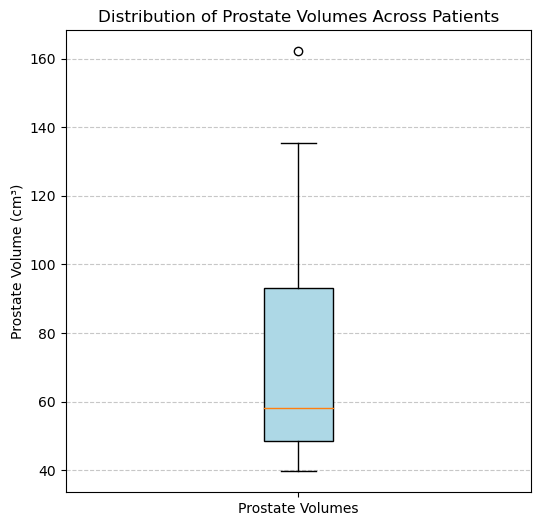

In [15]:
# Extract volume values for box plot
volume_values = list(patient_volumes.values())  

# Create a Box Plot
plt.figure(figsize=(6, 6))
plt.boxplot(volume_values, vert=True, patch_artist=True, boxprops=dict(facecolor="lightblue"))

# Customize the plot
plt.ylabel("Prostate Volume (cm³)")
plt.title("Distribution of Prostate Volumes Across Patients")
plt.xticks([1], ["Prostate Volumes"])
plt.grid(axis="y", linestyle="--", alpha=0.7)

# Show the plot
plt.show()

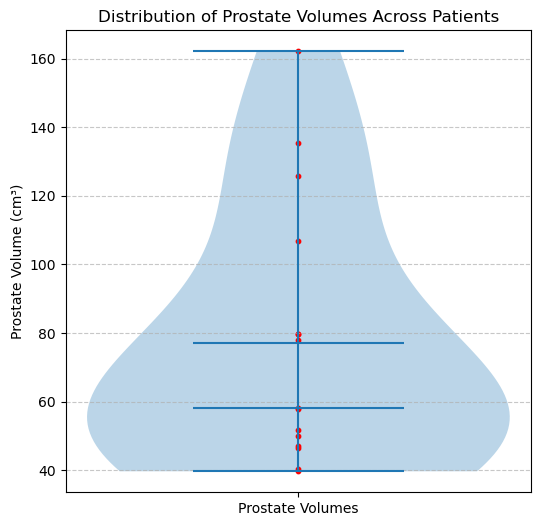

In [16]:
# Extract volume values for box plot
volume_values = list(patient_volumes.values())  

# violin plot with datapoints
plt.figure(figsize=(6, 6))
plt.violinplot(volume_values, showmeans=True, showmedians=True)
plt.scatter(np.ones(len(volume_values)), volume_values, color='r', s=10)
plt.ylabel("Prostate Volume (cm³)")
plt.title("Distribution of Prostate Volumes Across Patients")
plt.xticks([1], ["Prostate Volumes"])
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.show()